In [15]:
import numpy as np 
import pandas as pd 

import sklearn as sk 
#from sklearn.linear_model import 
from sklearn import tree
import matplotlib.pyplot as plt 

# read the cleaned data 
#data1 = pd.read_csv("agaricus-lepiota.csv")
data1 = pd.read_csv("agaricus-lepiota.csv")
data2 = pd.read_csv("agaricus-lepiota_one_line.csv")
print (data2.head())
print (data1.head())

data1.info()
data1.describe()

  Cap-shape Cap-surface Cap-color bruises odor Gill-attachment Gill-spacing  \
0         x           f         y       f    f               f            c   

  Gill-size Gill-color Stalk-shape  ... Stalk-color-above-ring  \
0         b          g           e  ...                      b   

  Stalk-color-below-ring Veil-type Veil-color Ring-number Ring-type  \
0                      n         p          w           o         l   

  Spore-print-color population habitat EDIBLE  
0                 h          v       g      p  

[1 rows x 23 columns]
  Cap-shape Cap-surface Cap-color bruises odor Gill-attachment Gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n     

,Cap-shape,Cap-surface,Cap-color,bruises,odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,Stalk-shape,...,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,population,habitat,EDIBLE
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [19]:
#Change the data from string to acceptable format:
for col in data1.select_dtypes(include=['object']).columns:
    data1[col] = data1[col].astype('category')
    data2[col] = data2[col].astype('category')

# Encoding categorical features
for col in data1.select_dtypes(include=['category']).columns:
    data1[col] = data1[col].cat.codes
    data2[col] = data2[col].cat.codes
    
    
#for col in data2.select_dtypes(include=['object']).columns:
    #data2[col] = data1[col].astype('category')

# Encoding categorical features
#for col in data2.select_dtypes(include=['category']).columns:
    #data2[col] = data1[col].cat.codes

    
    
data1.fillna((-999), inplace=True)
#data2.fillna((-999), inplace=True)

print (data2.head())
print (data1.head())

data1.info()
data1.describe()

  Cap-shape Cap-surface Cap-color bruises odor Gill-attachment Gill-spacing  \
0         5           2         4       1    6               1            0   

  Gill-size Gill-color Stalk-shape  ... Stalk-color-above-ring  \
0         1          4           0  ...                      7   

  Stalk-color-below-ring Veil-type Veil-color Ring-number Ring-type  \
0                      7         0          2           1         4   

  Spore-print-color population habitat EDIBLE  
0                 2          3       5      1  

[1 rows x 23 columns]
   Cap-shape  Cap-surface  Cap-color  bruises  odor  Gill-attachment  \
0          5            2          4        1     6                1   
1          5            2          9        1     0                1   
2          0            2          8        1     3                1   
3          5            3          8        1     6                1   
4          5            2          3        0     5                1   

   Gill-spaci

,Cap-shape,Cap-surface,Cap-color,bruises,odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,Stalk-shape,...,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,population,habitat,EDIBLE
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616,0.482029
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975,0.499708
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000,0.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000,1.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000,1.000000


In [49]:
# Split data into train and test:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

X, y = data1.iloc[:,:-1],data1.iloc[:,-1]
data1_dmatrix = xgb.DMatrix(data=X,label=y)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=123)

In [50]:
#objective = binary:logistic
#"objective":"reg:squarederror"

#eta = 1.0
# minimum loss reduction required to make a further partition
#gamma = 1.0
# minimum sum of instance weight(hessian) needed in a child
#min_child_weight = 1
# L2 regularization term on weights, default 0
#lambda = 0.01
# L1 regularization term on weights, default 0
#alpha = 0.01
# L2 regularization term on bias, default 0
#lambda_bias = 0.01
# 'learning_rate': 0.1,
# 'colsample_bytree': 0.3,
# reg_alpha (float (xgb's alpha)) – L1 regularization term on weights
# reg_lambda (float (xgb's lambda)) – L2 regularization term on weights
                   
                   

params = {"objective":"binary:logistic",
                'max_depth': 3, 'reg_alpha': 0.1, 'min_child_weight': 1, 
                'gamma': 1.0, 'eta': 1.0, 'reg_lambda': 0.01, 'lambda_bias': 0.01}

cv_results = xgb.cv(dtrain=data1_dmatrix, params=params, nfold=3,
                    num_boost_round=2,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.head()

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
0,0.208719,0.001962,0.208604,0.001133
1,0.125389,0.003045,0.125203,0.001836


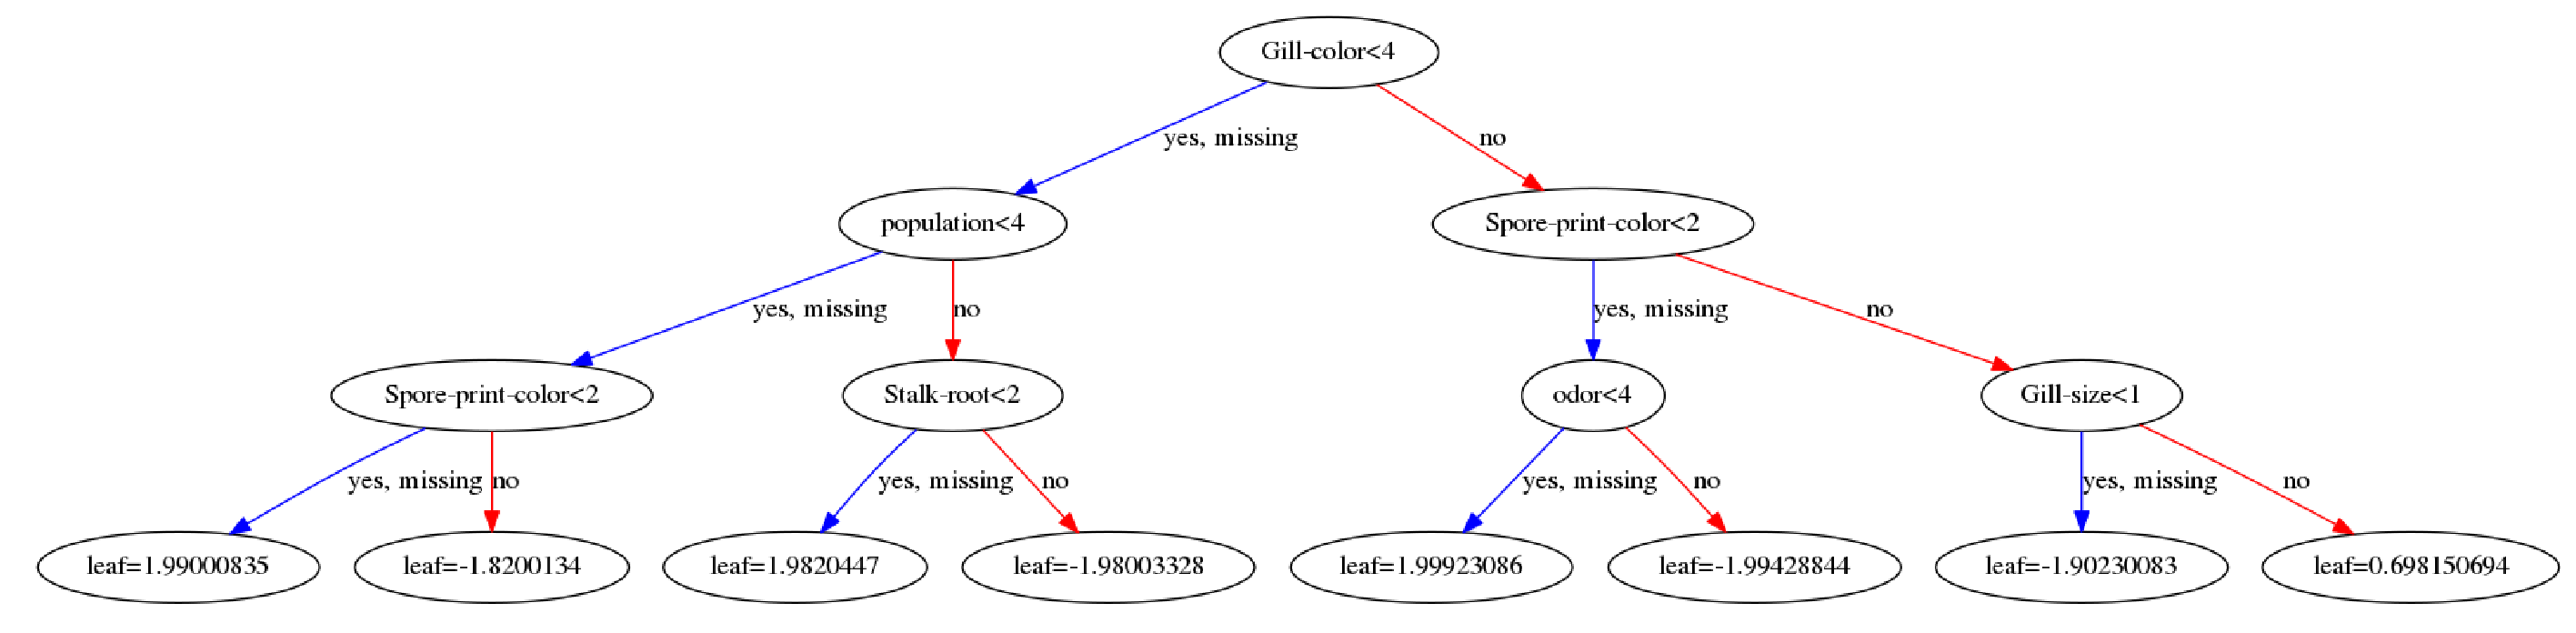

In [52]:
xg_reg = xgb.train(params=params, dtrain=data1_dmatrix, num_boost_round=2)

import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 50]
plt.show()

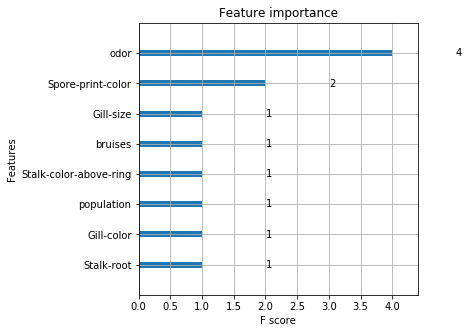

In [54]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [48]:
#print (data2.head())

#data2.info()
#data2.describe()

#X, y = data1.iloc[:,:-1],data2.iloc[:,-1]
#data2_dmatrix = xgb.DMatrix(data=X,label=y)
#X_test = data2_dmatrix
#y_test = data2_dmatrix

X, y = data1.iloc[:,:-1],data1.iloc[:,-1]
data1_dmatrix = xgb.DMatrix(data=X,label=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=44)
#X_test = data2_dmatrix
#y_test = data2_dmatrix
print (X_test)
print (y_test)

cv_results = xgb.cv(dtrain=data1_dmatrix, params=params, nfold=3,
                    num_boost_round=2,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.head()

      Cap-shape  Cap-surface  Cap-color  bruises  odor  Gill-attachment  \
3213          2            3          3        1     5                1   

      Gill-spacing  Gill-size  Gill-color  Stalk-shape  ...  \
3213             0          0           5            1  ...   

      Stalk-surface-below-ring  Stalk-color-above-ring  \
3213                         2                       6   

      Stalk-color-below-ring  Veil-type  Veil-color  Ring-number  Ring-type  \
3213                       6          0           2            1          4   

      Spore-print-color  population  habitat  
3213                  3           4        0  

[1 rows x 22 columns]
3213    0
Name: EDIBLE, dtype: int8


,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
0,0.208719,0.001962,0.208604,0.001133
1,0.125389,0.003045,0.125203,0.001836


In [67]:
from sklearn.linear_model import LinearRegression 
# the features or the 'x' values of the data 
# these columns are used to train the model 
# the last column, i.e, precipitation column 
# will serve as the label 
X = data1.drop(['EDIBLE'], axis = 1) 

# the output or the label. 
Y = data1['EDIBLE'] 
# reshaping it into a 2-D vector 
Y = Y.values.reshape(-1, 1) 

# consider a random day in the dataset 
# we shall plot a graph and observe this 
# day 
day_index = 760
days = [i for i in range(Y.size)] 

# initialize a linear regression classifier 
clf = LinearRegression() 
# train the classifier with our 
# input data. 
clf.fit(X, Y) 

# give a sample input to test our model 
# this is a 2-D vector that contains values 
# for each column in the dataset. 
inp = np.array([[2], [3], [4], [1], [5],
                 [0], [0], [5], [1],
                 [2], [6],
                 [6], [0], [2], [1], [4],
                 [3], [4], [0],
                 [3], [4], [2],
                 ])
#inp = np.array(data2)
inp = inp.reshape(1, -1) 
#inp = inp.reshape(-1, 1) 

# print the output. 
print('The precipitation in inches for the input is:', clf.predict(inp)) 



The precipitation in inches for the input is: [[2.54562081]]
